# **Tugas Akhir Data Mining**

Nama  : Farid Choirul Burhan

NIM   : A11.2020.12455

Kel.  : A11.4409



In [1]:
# Import Library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# 1) **Mengumpulkan Data**
Mengambil dataset berupa Breast Cancer

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) **Menelaah Data**

- Load Library yang diperlukan.
- Load Dataset.
- Memberi nama header atribut atau fitur (jika belum ada).
- Menganalisa tipe dan relasi data (melihat tipe dataset, ukuran dataset, distribusi class, deskripsi dataset).
- Memberikan laporan atau kesimpulan dari kegiatan menelaah data.

In [3]:
# Membaca data dari google drive
df = pd.read_csv('/content/drive/MyDrive/Associate Data Scientist/Materi Sesi 4 (Asessment)/breast-cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Melihat tipe dataset
type(df)
print('------------')
# Melihat ukuran dataset
print(df.shape)
print('------------')
# Melihat informasi tipe data semua kolom
df.info()

------------
(569, 33)
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    flo

pada class dan atribut yang ada didataset termasuk dataset yang bagus karena data konsisten. Pada kolom diagnosis harus diubah dari type data object menjadi type data numerik


In [6]:
# Melihat distribusi Class (apa saja jenisnya)
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
# Melihat distribusi Class (jumlahnya tiap Class)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5, 1.02, 'Distribusi Penderita Penyakit Kanker Payudara')

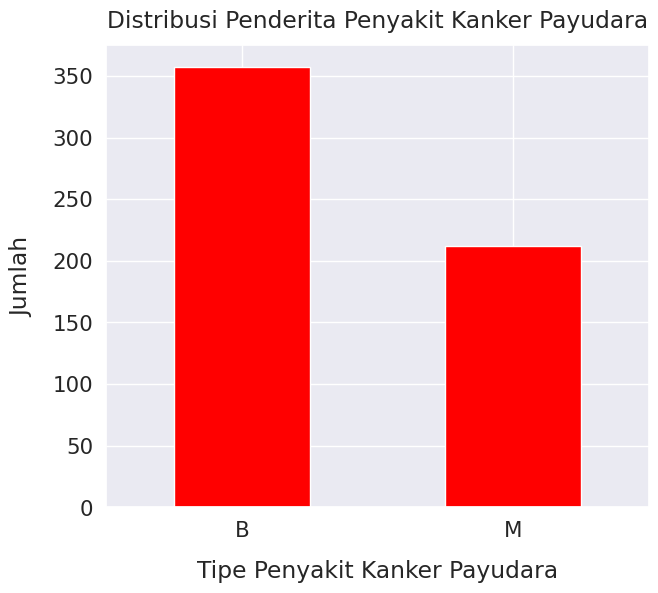

In [8]:
sns.set(font_scale=1.4)
df['diagnosis'].value_counts().plot(kind='bar', figsize=(7,6), rot=0, color='red')
plt.xlabel("Tipe Penyakit Kanker Payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Kanker Payudara", y=1.02)

In [9]:
# Melihat deskripsi dari dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Laporan atau Kesimpulan
================================================================
- data dari fitur yang tidak dipakai seperti (id,Unnamed: 32)
- fitur pada diagnosis yang tertera pada df.info() bertipe object


# 3) **Memvalidasi Data**


In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


tidak ada data yang null serta missing dalam dataset, tetapi ada kolom bernama Unnamed:32 yang harus dihilangkan





In [11]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
df.isnull().values.any()

True

In [12]:
# Melihat lokasi pada kolom dataframe yang kosong atau "NaN"
df.loc[:, df.isnull().any()].columns

Index(['Unnamed: 32'], dtype='object')

In [13]:
# Menghilangkan kolom atribut yang bernama Unnamed:32
df.drop('Unnamed: 32',axis=1,inplace=True)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 4) **Menentukan Object Data**

Atribut dari dataset yaitu radius_mean - fractal_dimension_worst dan labelnya yaitu diagnosis


In [15]:
# Menghapus kolom id karena tidak diperlukan
df.drop('id',axis=1,inplace=True)

In [16]:
# Melihat distribusi class pada diagnosis
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
# Mengubah tipe data diagnosis yang sebelumnya object menjadi tipe data numeric
# Jika berlabel M menjadi M = 1, jika B menjadi B = 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Melihat distribusi class pada diagnosis setelah diubah
df.diagnosis.unique()

array([1, 0])

# 5) **Membersihkan Data**
Strategi pembersihan data :
- Perbaiki nilai yang hilang.
- Hapus data duplikat.
- Cek fitur yang bernilai konstant.

Tidak ada data yang hilang atau isnull


Dataset sudah bersih

# 6) Mengkonstruksi Data
terdiri dari :
- Representasi fitur dan merubah tipenya.
- Membagi data menjadi training dan testing.
- Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA


In [19]:
# Membagi Training dan Testing
X = df.iloc[:,1:31]
y = df['diagnosis']

# Menampilkan X
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# **Data Original**

In [21]:
# Membagi data menjadi training = 80% dan testing = 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2022)

In [22]:
# Menampilkan Data
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
544,13.87,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
226,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.02107,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.1384,0.1212,0.10200,0.05602,0.2688,0.06888
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158


# **Data Normalisasi**

In [23]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [24]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [25]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.2, random_state=2022)

# 7) **Menentukan Label Data**

Label pada data menunjukan pada kolom diagnosis

# 8) **Membangun Model**

**Logistic Regression dengan Data Original**

In [26]:
# Membuat model regresi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [27]:
# Train model
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# membuat prediksi pada data test
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


## Logistic Regression denga Data Normalisasi

In [29]:
# Membuat model regresi
model = LogisticRegression()

In [30]:
model.fit(X_train_norm, Y_train_norm)

LogisticRegression()

In [31]:
# membuat prediksi pada data test
y_pred_norm = model.predict(X_test_norm)

# Menghitung akurasi
accuracy = accuracy_score(Y_test_norm, y_pred_norm)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


# 9) Mengevaluasi Hasil Pemodelan

## Evaluasi dengan Data Original

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(Y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[65  3]
 [ 6 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.93      0.87      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



## Evaluasi dengan Data Normalisasi

In [33]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test_norm, y_pred_norm)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(Y_test_norm, y_pred_norm)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[66  2]
 [ 1 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.96      0.98      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Cari kenapa jika memakai Data Normalisasi Akurasinya meningkat
